In [5]:
#! Mall Customer Data - Predictive Analysis class project Seneca
#Clustering, Multiple - Univariate  Regression, K-means 

In [8]:
#Load Libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from fpdf import FPDF
  
from fpdf import FPDF
  
# save FPDF() class into a 
# variable pdf
pdf = FPDF()
  
# Add a page
pdf.add_page()
  
# set style and size of font 
# that you want in the pdf
pdf.set_font("Arial", size = 15)
  
# create a cell
pdf.cell(200, 10, txt = "GeeksforGeeks", 
         ln = 1, align = 'C')
  
# add another cell
pdf.cell(200, 10, txt = "A Computer Science portal for geeks.",
         ln = 2, align = 'C')
  
# save the pdf with name .pdf
pdf.output("GFG.pdf")  

ModuleNotFoundError: No module named 'fpdf'

In [9]:
#Load Dataset
data = pd.read_csv("Mall_Customers-analysis.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.shape

(200, 5)

In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Annual Income (k$)')

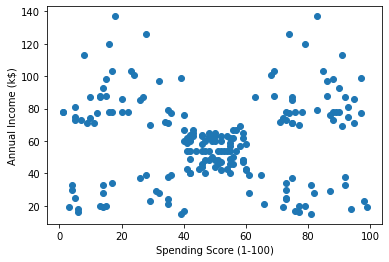

In [13]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'],)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

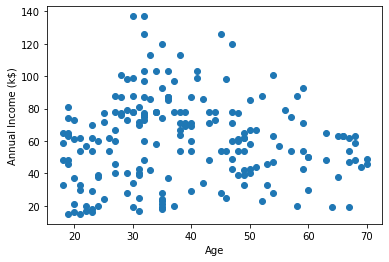

In [14]:
plt.scatter(data['Age'],data['Annual Income (k$)'],)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

In [15]:
# Feature sleection for the model (spending score and ann. income)
X = data.iloc[:, [3,4]].values

In [16]:
#Building the model, finding the cluster needed Elbow meethod
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Durmus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


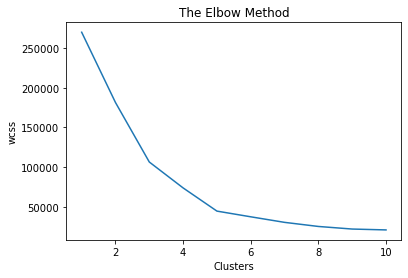

In [17]:
#Visualizing kmeans to see the number of clusters
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
# Cluster number shall be 5 since break point seems at 5
cluster = KMeans(n_clusters= 5, init='k-means++', random_state=0)
cluster_kmeans= cluster.fit_predict(X)

In [19]:
# 1Cluster number showing
c_class = cluster.fit_predict(data[["Spending Score (1-100)","Annual Income (k$)"]])
c_class

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [20]:
data[cluster] = c_class
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),"KMeans(n_clusters=5, random_state=0)"
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4


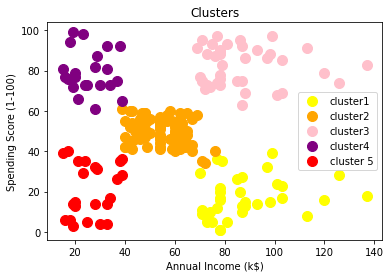

In [21]:
#Visualizing, labeling the clusters 
plt.scatter(X[cluster_kmeans == 0, 0], X[cluster_kmeans == 0, 1], s = 100, c = 'yellow', label = 'cluster1')
plt.scatter(X[cluster_kmeans == 1, 0], X[cluster_kmeans == 1, 1], s = 100, c = 'orange', label = 'cluster2')
plt.scatter(X[cluster_kmeans == 2, 0], X[cluster_kmeans == 2, 1], s = 100, c = 'pink', label = 'cluster3')
plt.scatter(X[cluster_kmeans == 3, 0], X[cluster_kmeans == 3, 1], s = 100, c = 'purple', label = 'cluster4')
plt.scatter(X[cluster_kmeans == 4, 0], X[cluster_kmeans == 4, 1], s = 100, c = 'red', label = 'cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'centroids')
plt.title('Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



In [22]:
# Feature sleection for the model (spending score and age)
Y = data.iloc[:, [2,4]].values

In [23]:
#Building the model, finding the cluster needed Elbow meethod
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans2 = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans2.fit(Y)
    wcss.append(kmeans2.inertia_)

C:\Users\Durmus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


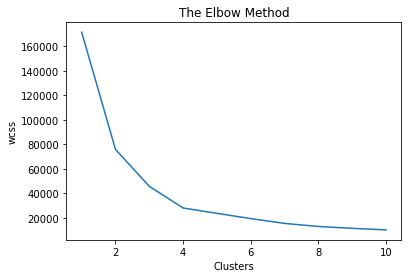

In [24]:
#Visualizing kmeans to see the number of clusters
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wcss')
plt.show()

In [25]:
# Break point seems at 4
cluster2 = KMeans(n_clusters= 4, init='k-means++', random_state=0)
cluster_kmeans2= cluster.fit_predict(Y)

In [21]:
# 2 Cluster
c_class2 = cluster.fit_predict(data[["Spending Score (1-100)","Age"]])
c_class2
data[cluster2] = c_class2
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),"KMeans(n_clusters=5, random_state=0)","KMeans(n_clusters=4, random_state=0)"
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,4,3


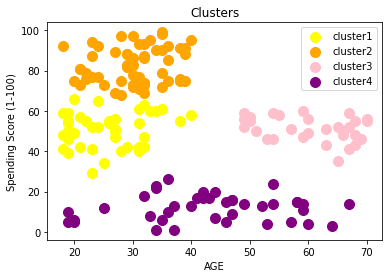

In [26]:
# Visualizing, labeling the clusters
plt.scatter(Y[cluster_kmeans2 == 0, 0], Y[cluster_kmeans2 == 0, 1], s = 100, c = 'yellow', label = 'cluster1')
plt.scatter(Y[cluster_kmeans2 == 1, 0], Y[cluster_kmeans2 == 1, 1], s = 100, c = 'orange', label = 'cluster2')
plt.scatter(Y[cluster_kmeans2 == 2, 0], Y[cluster_kmeans2 == 2, 1], s = 100, c = 'pink', label = 'cluster3')
plt.scatter(Y[cluster_kmeans2 == 3, 0], Y[cluster_kmeans2 == 3, 1], s = 100, c = 'purple', label = 'cluster4')
#plt.scatter(Y[cluster_kmeans2 == 4, 0], Y[cluster_kmeans2 == 4, 1], s = 100, c = 'red', label = 'cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'centroids')
plt.title('Clusters')
plt.xlabel('AGE')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

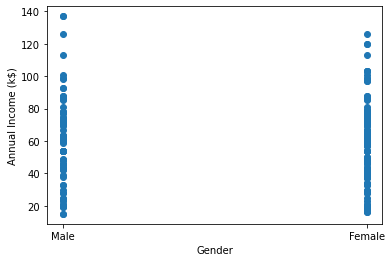

In [27]:
plt.scatter(data['Gender'],data['Annual Income (k$)'],)
plt.xlabel("Gender")
plt.ylabel("Annual Income (k$)")

In [28]:
#! LINEAR REGRESSION ANALYSIS

In [29]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [30]:
data2 = pd.read_csv("Mall_Customers-analysis.csv")
data2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


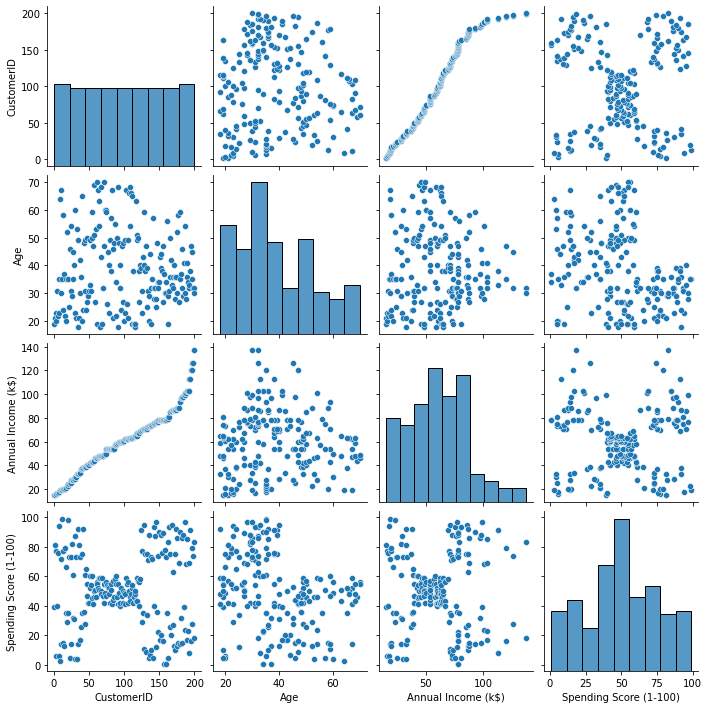

In [31]:
sns.pairplot(data2)

In [32]:
data2.shape

(200, 5)

In [33]:
data2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
#since this is a linear regression model, we will conduct analysis on suitable variables namely; Spending, İncome and Age
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
#Variable placing
X = data2[['Age' , 'Annual Income (k$)']].values
y = data2['Spending Score (1-100)'].values

C:\Users\Durmus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

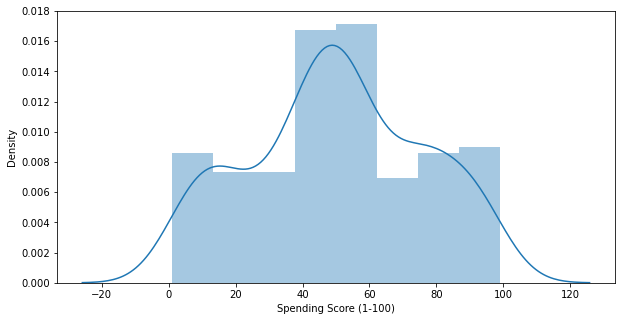

In [36]:
#Checking the target variable plot
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(data2['Spending Score (1-100)'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
coeff_df = pd.DataFrame(regressor.coef_, index=['Age' , 'Annual Income (k$)'], columns=['Coefficient'])
coeff_df

,Coefficient
Age,-0.495256
Annual Income (k$),-0.023788


In [40]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(30)

,Actual,Predicted
0,29,43.927155
1,13,48.347814
2,46,41.985137
3,42,45.004247
4,69,54.762353
5,15,45.114615
6,76,58.927556
7,36,44.623644
8,15,41.026983
9,20,46.580880


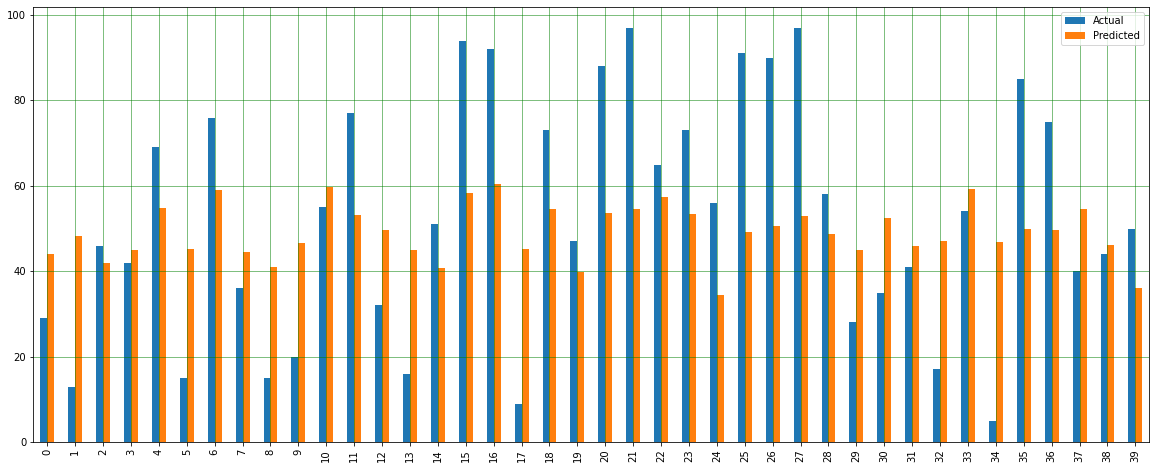

In [41]:
df.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 21.545138753160735
Mean Squared Error: 623.7455096905663
Root Mean Squared Error: 24.974897591192768


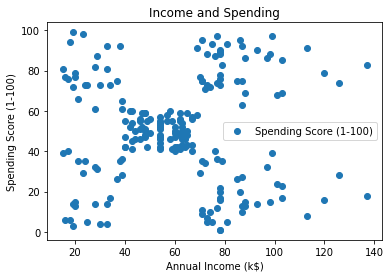

In [44]:
#Variable placing (univariate1)
data2.plot(x='Annual Income (k$)', y='Spending Score (1-100)', style='o')  
plt.title('Income and Spending')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.show()



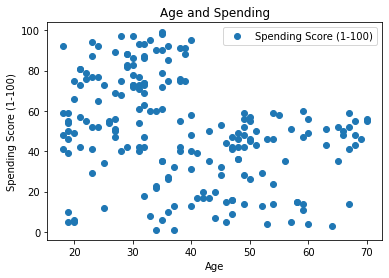

In [45]:
data2.plot(x='Age', y='Spending Score (1-100)', style='o')  
plt.title('Age and Spending')  
plt.xlabel('Age')  
plt.ylabel('Spending Score (1-100)')  
plt.show()


C:\Users\Durmus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

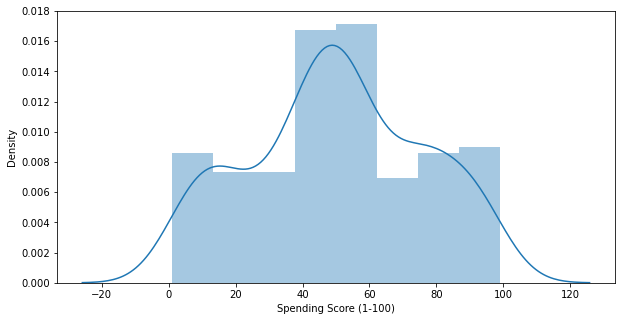

In [46]:
#Variable placing (univariate) Income and Spending
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(data2['Spending Score (1-100)'])

In [47]:
# 1 Variable placing (univariate) Income and Spending
X = data2['Annual Income (k$)'].values.reshape(-1,1)
y = data2['Spending Score (1-100)'].values.reshape(-1,1)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [50]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[50.89337007]
[[-0.0205092]]


In [51]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,29,50.421659
1,13,49.109070
2,46,49.601291
3,42,49.642309
4,69,49.088561
5,15,48.883469
6,76,50.544714
7,36,49.314162
8,15,50.483186
9,20,49.293653


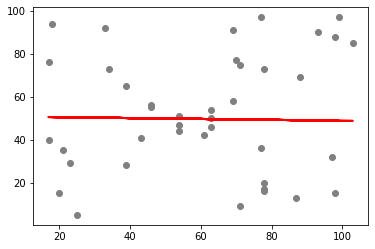

In [52]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

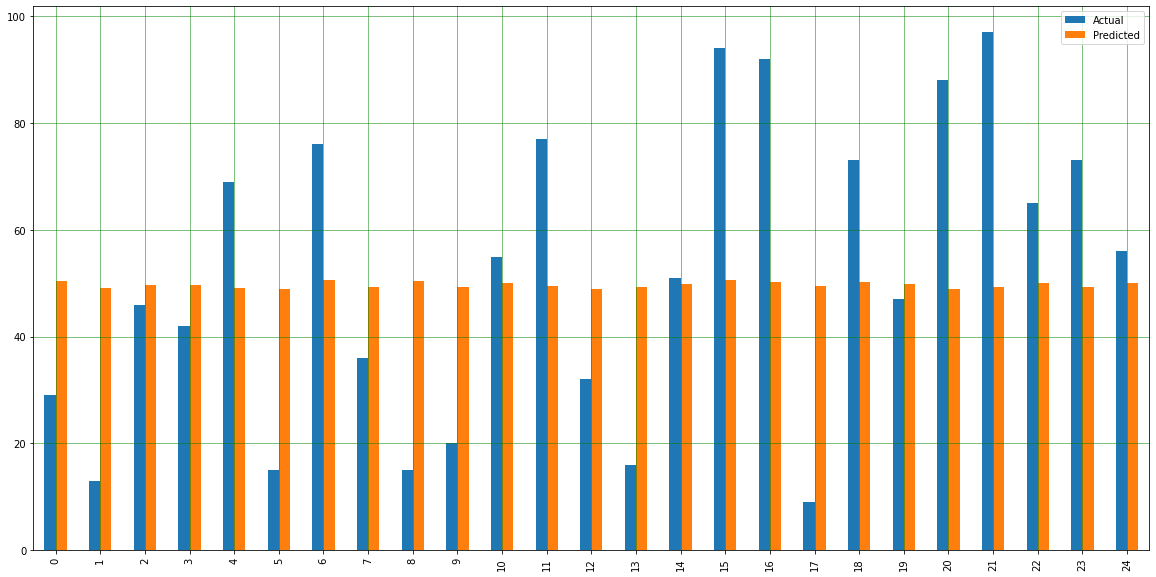

In [53]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 23.480437598231717
Mean Squared Error: 769.0201908441097
Root Mean Squared Error: 27.731213295564796


In [55]:
# 2 Variable placing (univariate) Age and Spending
X1 = data2['Age'].values.reshape(-1,1)
y = data2['Spending Score (1-100)'].values.reshape(-1,1)

In [56]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=0)
regressor2 = LinearRegression()  
regressor2.fit(X_train1, y_train1) #training the algorithm

LinearRegression()

In [57]:
#To retrieve the intercept:
print(regressor2.intercept_)

#For retrieving the slope:
print(regressor2.coef_)

[68.76459512]
[[-0.49471615]]


In [58]:
y_pred2 = regressor.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})
df2

,Actual,Predicted
0,29,50.421659
1,13,49.109070
2,46,49.601291
3,42,49.642309
4,69,49.088561
5,15,48.883469
6,76,50.544714
7,36,49.314162
8,15,50.483186
9,20,49.293653


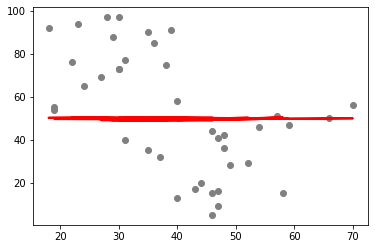

In [59]:
plt.scatter(X_test1, y_test1,  color='gray')
plt.plot(X_test1, y_pred2, color='red', linewidth=2)
plt.show()

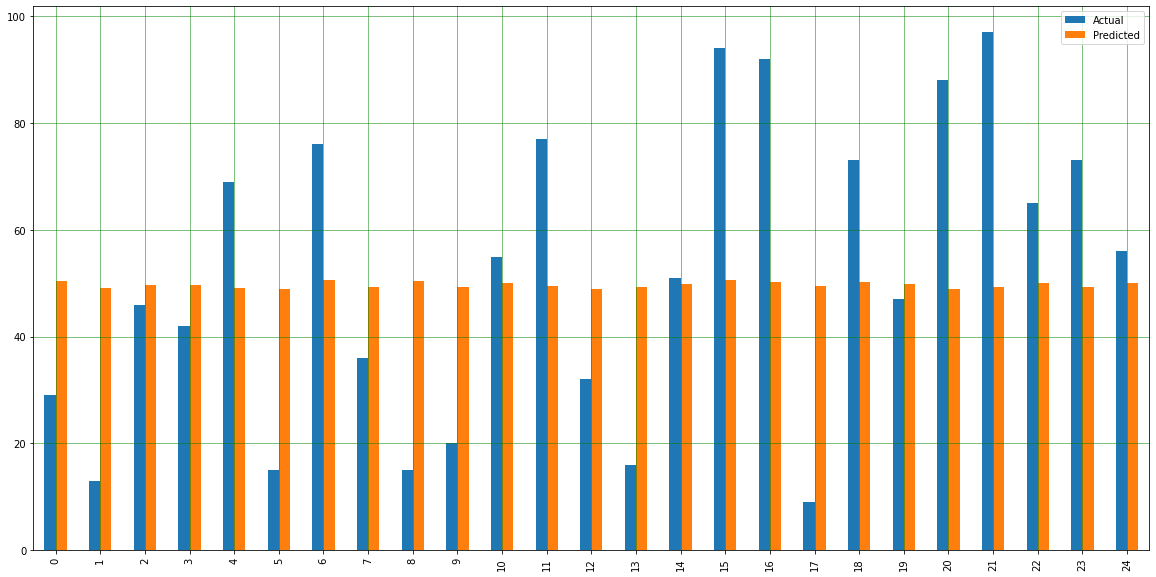

In [60]:
df2 = df2.head(25)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 23.480437598231717
Mean Squared Error: 769.0201908441097
Root Mean Squared Error: 27.731213295564796


In [62]:
#! 3 K-Nearest Neighbors Analysis

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
data3 = pd.read_csv("Mall_Customers-analysis.csv")
# data3 = pd.read_csv('Mall_Customers-analysis.csv', converters={'Gender': lambda x: int(x == 'Male')})
data3.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
data3.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [66]:
X = data3[['Age','Annual Income (k$)','Spending Score (1-100)']]
y = data3['Gender'] 

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

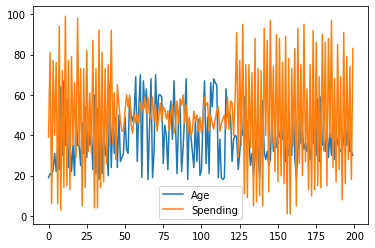

In [68]:
plt.plot(data3['Age'],label='Age')
#plt.plot(data3['Annual Income (k$)'],label='Income')
plt.plot(data3['Spending Score (1-100)'],label='Spending')
plt.legend()

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [71]:
y_pred = classifier.predict(X_test)


In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  3]
 [13  2]]
              precision    recall  f1-score   support

      Female       0.63      0.88      0.73        25
        Male       0.40      0.13      0.20        15

    accuracy                           0.60        40
   macro avg       0.51      0.51      0.47        40
weighted avg       0.54      0.60      0.53        40



In [73]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

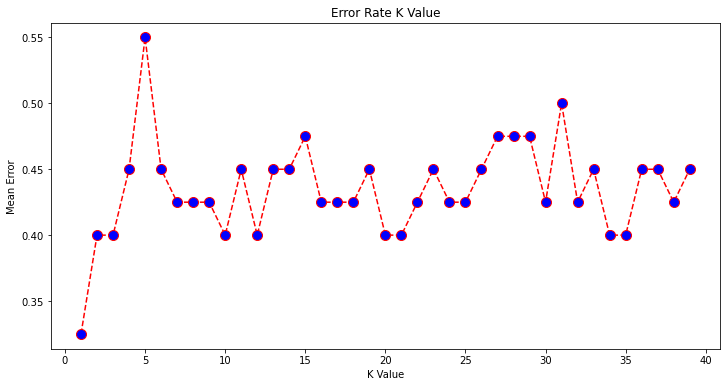

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [75]:
knn=KNeighborsClassifier()

In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
knn.score(X_test,y_test)

0.45

In [78]:
predict = dict(zip(data3.CustomerID.unique(), data3.Gender.unique()))

In [79]:
#parameters of following function are spending, income and age
prediction1=knn.predict([['19','15','99']])
predict[prediction1[0]]

C:\Users\Durmus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


KeyError: 'Male'

In [80]:
#parameters of following function are spending, income and age
prediction2=knn.predict([['6','16','20']])
predict[prediction2[0]]

C:\Users\Durmus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


KeyError: 'Male'